In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
dtframe=pd.read_csv("weatherHistory.csv")

In [4]:
print(dtframe)

                      Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting in the morning.

[96453 rows x 1

In [5]:
dtframe.shape

(96453, 11)

In [6]:
#getting details of first 5 rows of dataset
dtframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [7]:
dtframe.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [8]:
dtframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [9]:
dtframe.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
#converting the given dataset into UTC format
dtframe['Formatted Date'] = pd.to_datetime(dtframe['Formatted Date'], utc=True)
dtframe.set_index('Formatted Date', inplace= True)

In [11]:
#resampling the data
newDtframe = dtframe[['Apparent Temperature (C)','Humidity']].resample('M').mean() #month-end frequency
newDtframe.head(6)

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
2006-05-31 00:00:00+00:00,15.539479,0.721801


Variations in  Apparent temperature and humidity for all 12 months in period of 2006-2016

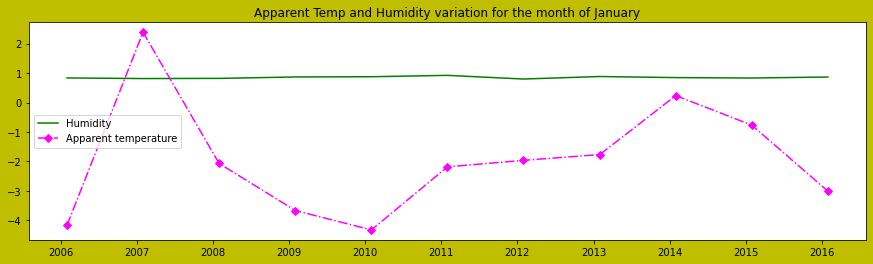

In [12]:
jandf= newDtframe[newDtframe.index.month == 1]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(jandf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(jandf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of January')
plt.legend(loc= 'center left')

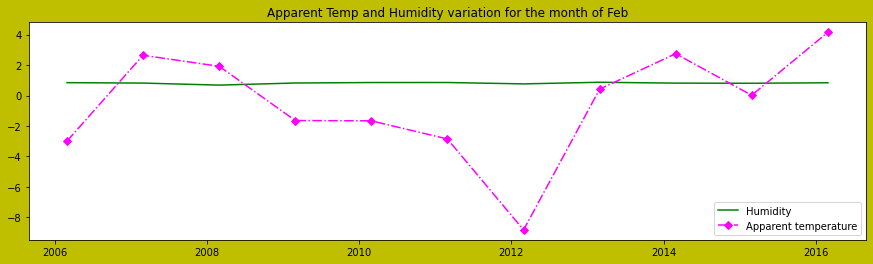

In [13]:
febdf= newDtframe[newDtframe.index.month == 2]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(febdf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(febdf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of Feb')
plt.legend(loc= 'lower right')

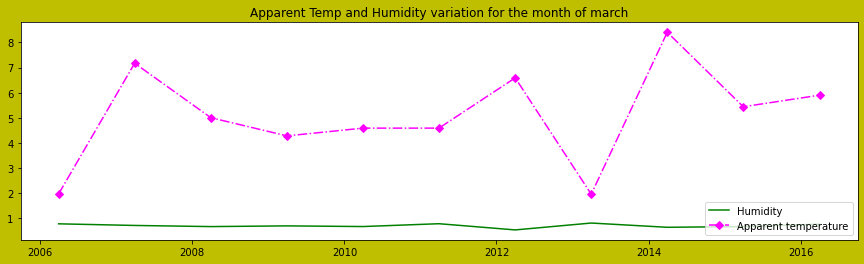

In [14]:
mardf= newDtframe[newDtframe.index.month == 3]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(mardf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(mardf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of march')
plt.legend(loc= 'lower right')

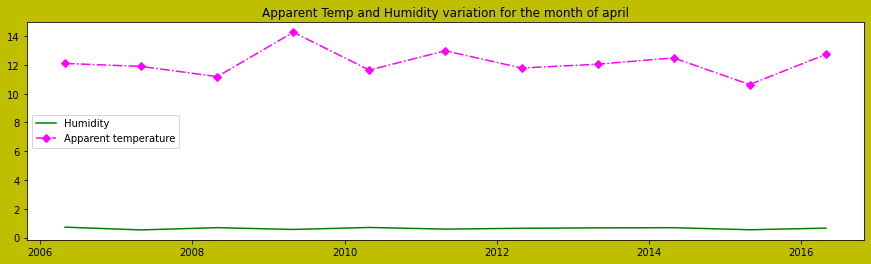

In [15]:
aprildf= newDtframe[newDtframe.index.month == 4]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(aprildf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(aprildf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of april')
plt.legend(loc= 'center left')

Text(0, 0.5, 'Apparent Temperature')

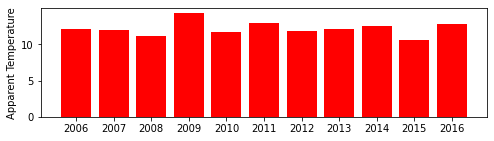

In [16]:
#Conclusion: we see that Humidity remains almost constant  No major change in Average Humidity. But we can see an Increase in Average Apparent Temperature in the year 2009 then again it dropped in 2010 then there was a slight increase in 2011 and a drop is observed in 2015 and again it increased in 2016.
fig, ax = plt.subplots(figsize=(8, 2))
ax.bar(aprildf.index.year,aprildf['Apparent Temperature (C)'],color='red')
plt.xticks(aprildf.index.year)
plt.ylabel('Apparent Temperature')

Text(0.5, 1.0, 'Variation in Humdidty for April month')

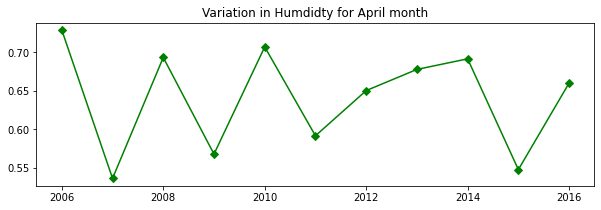

In [17]:
plt.figure(figsize=(10,3))
a = np.arange(2006,2017)
plt.plot(a,aprildf['Humidity'],color='green',linestyle='-',marker='D')
plt.title('Variation in Humdidty for April month')

Text(0.5, 1.0, 'Variation in Apparent temp for April month')

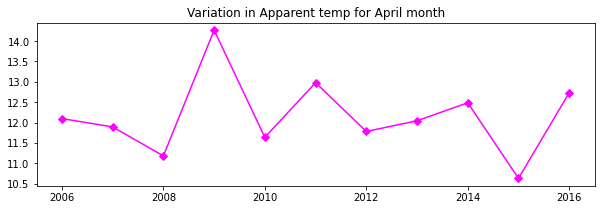

In [18]:
plt.figure(figsize=(10,3))
a = np.arange(2006,2017)
plt.plot(a,aprildf['Apparent Temperature (C)'],color='magenta',linestyle='-',marker='D')
plt.title('Variation in Apparent temp for April month')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

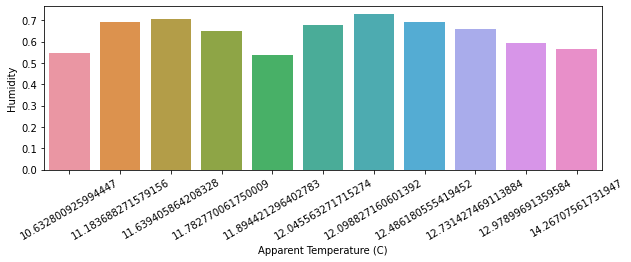

In [19]:
plt.figure(figsize=(10,3))
sns.barplot(x='Apparent Temperature (C)',y='Humidity',data =aprildf)
plt.xticks(rotation=30)

Text(0, 0.5, 'Humidity')

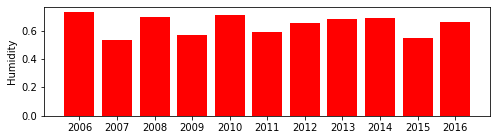

In [20]:
fig, ax = plt.subplots(figsize=(8,2))
ax.bar(aprildf.index.year,aprildf['Humidity'],color='red')
plt.xticks(aprildf.index.year)
plt.ylabel('Humidity')

Text(0, 0.5, 'Apparent Temperature')

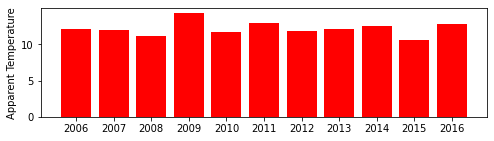

In [21]:
#Conclusion: In the fig.1 plot, we see that Humidity remains almost constant .In fig 4. No major change in Average Humidity. But we can see an Increase in Average Apparent Temperature in the year 2009 then again it dropped in 2010 then there was a slight increase in 2011 and a drop is observed in 2015 and again it increased in 2016.
fig, ax = plt.subplots(figsize=(8, 2))
ax.bar(aprildf.index.year,aprildf['Apparent Temperature (C)'],color='red')
plt.xticks(aprildf.index.year)
plt.ylabel('Apparent Temperature')

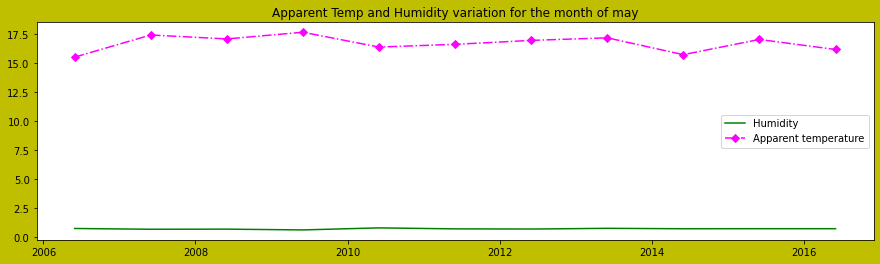

In [22]:
maydf= newDtframe[newDtframe.index.month == 5]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(maydf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(maydf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of may')
plt.legend(loc= 'center right')

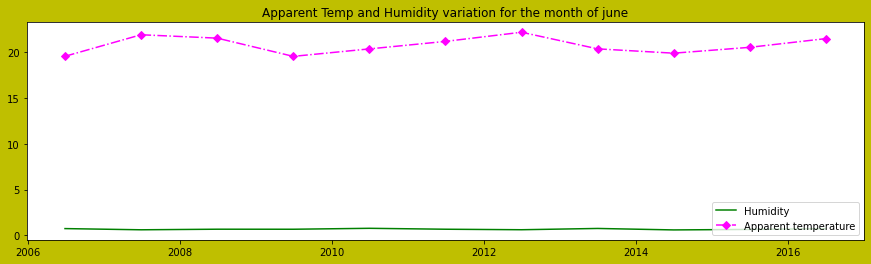

In [23]:
jundf= newDtframe[newDtframe.index.month == 6]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(jundf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(jundf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of june')
plt.legend(loc= 'lower right')

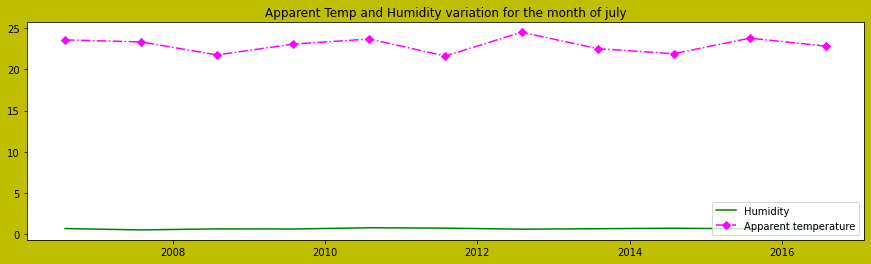

In [24]:
juldf= newDtframe[newDtframe.index.month == 7]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(juldf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(juldf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of july')
plt.legend(loc= 'lower right')

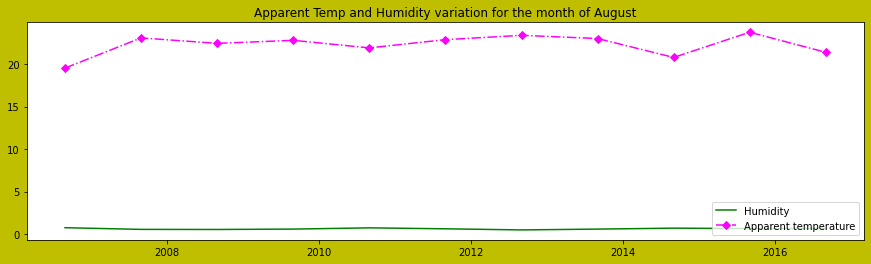

In [25]:
augdf= newDtframe[newDtframe.index.month == 8]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(augdf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(augdf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of August')
plt.legend(loc= 'lower right')

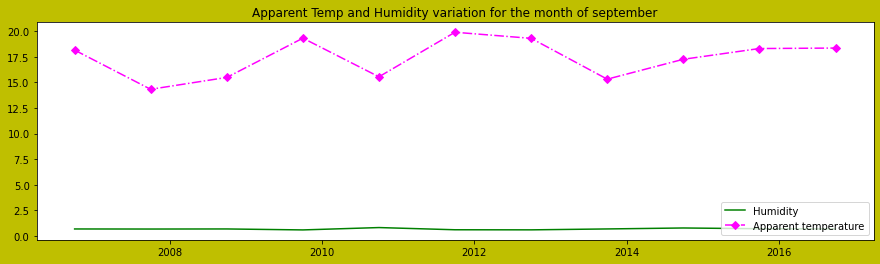

In [26]:
sepdf= newDtframe[newDtframe.index.month == 9]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(sepdf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(sepdf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of september')
plt.legend(loc= 'lower right')

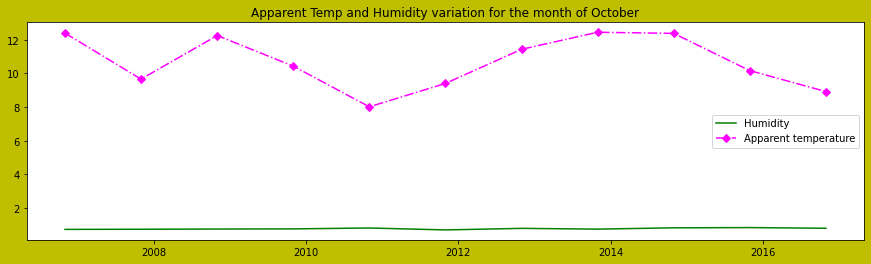

In [27]:
octdf= newDtframe[newDtframe.index.month == 10]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(octdf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(octdf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of October')
plt.legend(loc= 'center right')

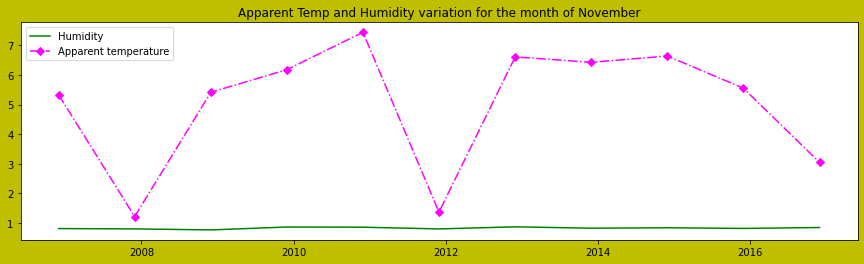

In [28]:
novdf= newDtframe[newDtframe.index.month == 11]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(novdf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(novdf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of November')
plt.legend(loc= 'upper left')

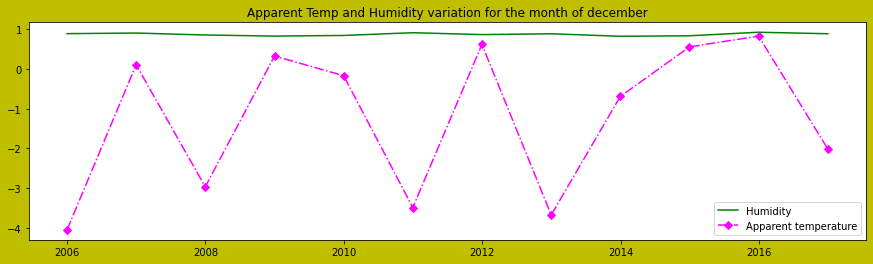

In [29]:
decdf= newDtframe[newDtframe.index.month == 12]
plt.figure(figsize= (15,4),facecolor='y')
plt.plot(decdf['Humidity'],label = 'Humidity', color = 'green') 
plt.plot(decdf['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'magenta',linestyle='dashdot',marker='D')
plt.title('Apparent Temp and Humidity variation for the month of december')
plt.legend(loc= 'lower right')

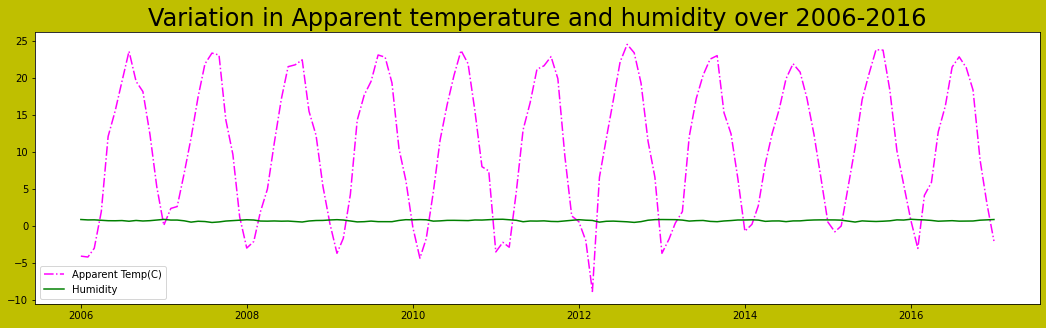

In [30]:
plt.figure(figsize=(18,5),facecolor='y')
plt.plot(newDtframe['Apparent Temperature (C)'],label='Apparent Temp(C)',color='magenta',linestyle='dashdot')
plt.plot(newDtframe['Humidity'],label='Humidity',color='green')
plt.title('Variation in Apparent temperature and humidity over 2006-2016',fontsize = 24)
plt.legend()

Conclusion: we see that Humidity remains almost constant  No major change in Average Humidity. But we can see an Increase in Average Apparent Temperature in the year 2009 then again it dropped in 2010 then there was a slight increase in 2011 and a drop is observed in 2015 and again it increased in 2016.